### Importing Libraries

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

### Fetching Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


### Sample images

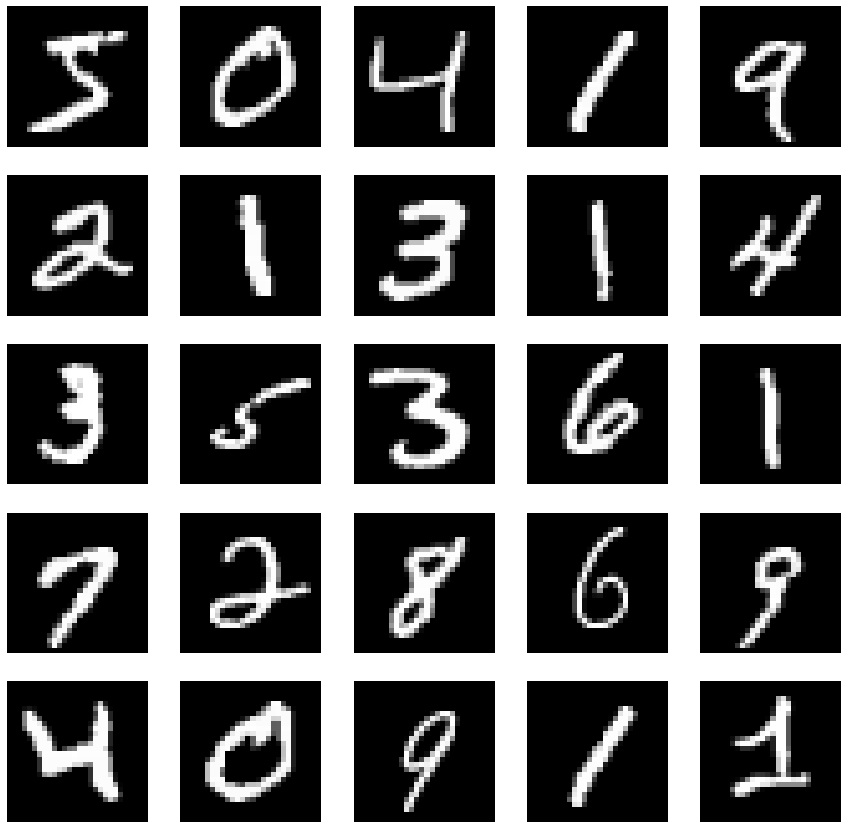

In [5]:
f, ax = plt.subplots(5, 5, figsize = (15, 15))
for i in range(0,25):
    ax[i//5, i%5].imshow(x_train[i], cmap=plt.get_cmap('gray'))
    ax[i//5, i%5].axis('off')
plt.show()

### Reducing the images into a vector of pixels

In [6]:
num_pixels=x_train.shape[1]*x_train.shape[2]

In [7]:
x_train=x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')

In [8]:
x_test=x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')

### Normalization

In [9]:
x_train=x_train/255

In [10]:
x_test=x_test/255

### Encoding

In [11]:
y_train=np_utils.to_categorical(y_train)

In [12]:
y_test=np_utils.to_categorical(y_test)

### CNN baseline model with 3 hidden layers

In [13]:
num_classes=y_test.shape[1]

In [14]:
num_classes

10

In [15]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
cnn_model=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=64)


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2866 - accuracy: 0.9095 - val_loss: 0.0585 - val_accuracy: 0.9816
Epoch 2/15
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0890 - accuracy: 0.9732 - val_loss: 0.0379 - val_accuracy: 0.9879
Epoch 3/15
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 4/15
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0231 - val_accuracy: 0.9920
Epoch 5/15
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0232 - val_accuracy: 0.9924
Epoch 6/15
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0256 - val_accuracy: 0.9909
Epoch 7/15
60000/60000 [==============================] - 90s 2ms/s

### Model Evaluation

In [18]:
scores=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 420us/step


In [19]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.02091785258818468
Test accuracy: 0.9941999912261963


In [20]:
print(cnn_model.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


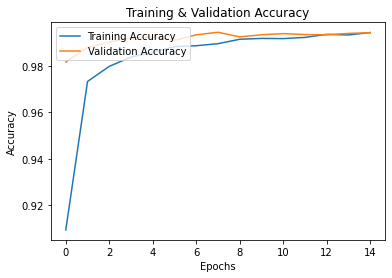

In [21]:
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

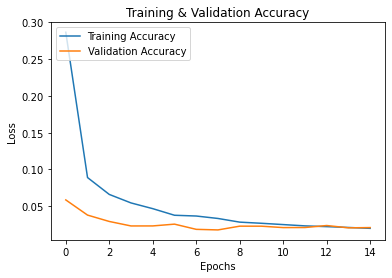

In [22]:
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

### Predictions

In [23]:
predictions = model.predict(x_test)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(y_test,axis=1)[:25]
print(first20_preds)
print(first20_true)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


### Incorrect predictions